# Sistema de agrupación de casas

### Paso 1: Carga del conjunto de datos

In [24]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import seaborn as sns
from sklearn.metrics import accuracy_score

In [25]:
data = pd.read_csv('/Users/julian/Desktop/vs code/UNSUPERVISED_LEARNING_Project_25_Julian_Lopez/UNSUPERVISED_LEARNING_Project_25_Julian_Lopez/data/raw/housing.csv')
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [26]:
# Me quedo con las columnas relevantes
data_limpia = data[['Latitude', 'Longitude', 'MedInc']]
data_limpia.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [27]:
# Dividimos el conjunto de datos en muestras de train y test
from sklearn.model_selection import train_test_split

X = data_limpia

X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)

X_train.head()

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542


### Paso 2: Construye un K-Means

In [28]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Entrenar el modelo con 6 clusters
model = KMeans(n_clusters = 6, random_state = 77)
model.fit(X_train)

KMeans(n_clusters=6, random_state=77)

In [29]:
#visualizo los clusters
model.labels_

array([1, 1, 2, ..., 1, 4, 0], dtype=int32)

In [30]:
# Confirmo que el numero de clusters coincide. 
np.unique(model.labels_)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [31]:
# Creo la nueva columna que sera mi target 
X_train['Cluster'] = model.labels_

X_train.head()

,Latitude,Longitude,MedInc,Cluster
14196,32.71,-117.03,3.2596,1
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,2
14265,32.69,-117.11,1.9425,1
2271,36.78,-119.80,3.5542,0


#### Graficamos el nuevo dataset con los clusters y visualizamos los centroides.  

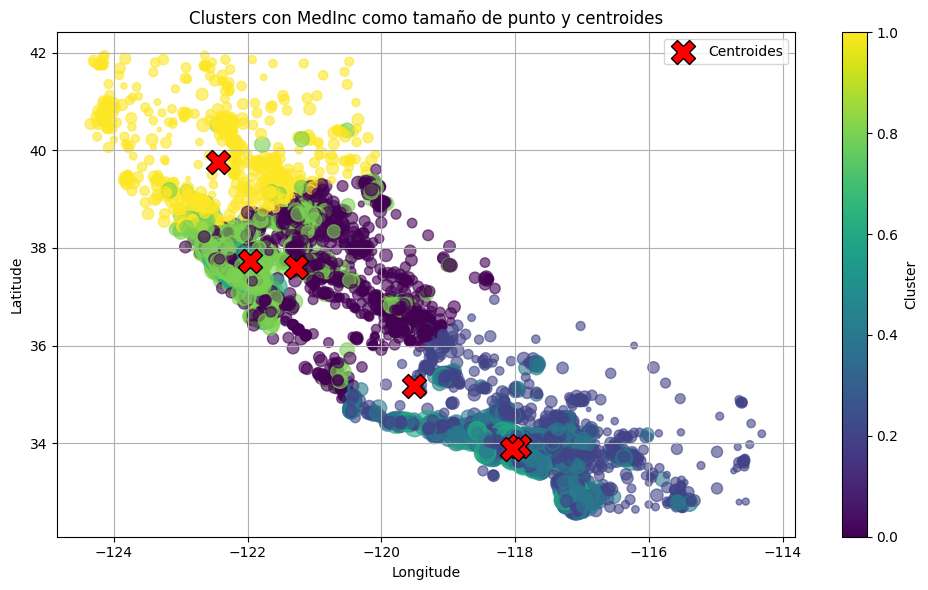

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter de los puntos
plt.scatter(
    X_train['Longitude'], X_train['Latitude'],
    c = X_train['Cluster'], cmap = 'viridis',
    s = X_train['MedInc'] * 20,  # Tamaño proporcional a MedInc
    alpha=0.6,
)

# Centroides
centroides = model.cluster_centers_
plt.scatter(
    centroides[:, 1], centroides[:, 0],  # Longitude y Latitude
    c = 'red', edgecolors = 'black', marker = 'X', s=300, label = 'Centroides',
    zorder = 10  # Asegura que estén por encima
)

# Estética
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters con MedInc como tamaño de punto y centroides')
plt.colorbar(label = 'Cluster')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


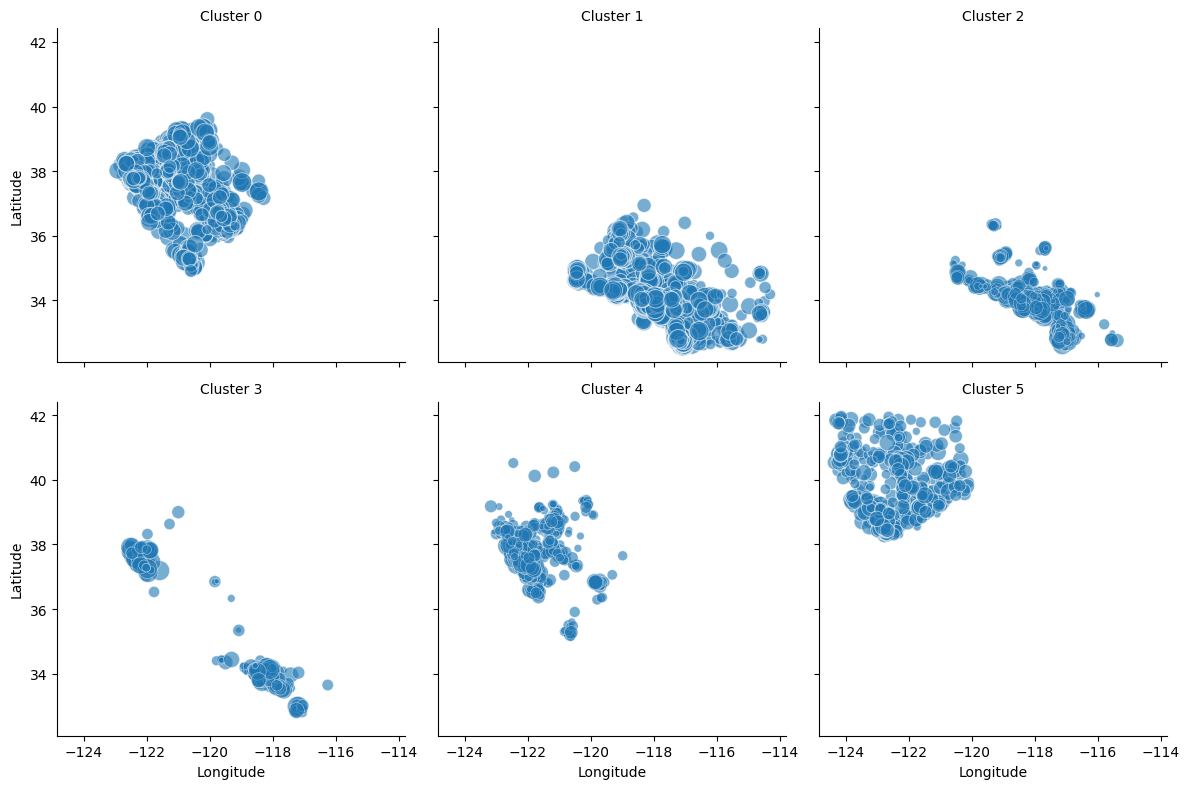

In [33]:
import seaborn as sns

grid = sns.FacetGrid(X_train, col = "Cluster", col_wrap = 3, height = 4)
grid.map_dataframe(sns.scatterplot, x = "Longitude", y = "Latitude", size = "MedInc", sizes = (10, 200), alpha = 0.6)
grid.set_axis_labels("Longitude", "Latitude")
grid.set_titles("Cluster {col_name}")
plt.tight_layout()
plt.show()

#### Graficamos tambien el dendograma para enriquecer las visualización

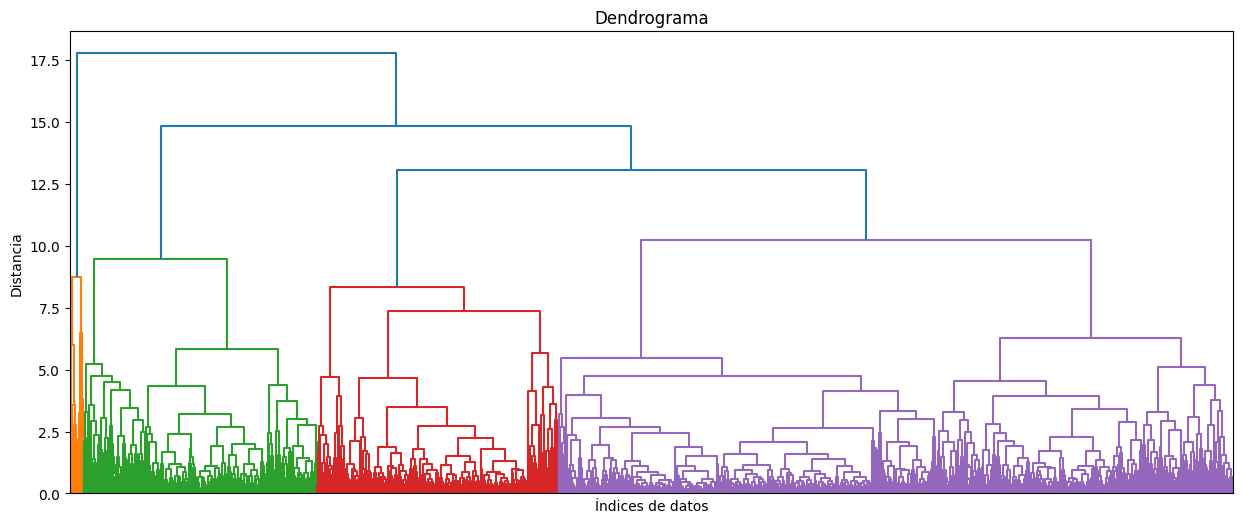

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcular la matriz de similitud entre clusters
Z = linkage(X_train, method = "complete")

# Mostrar el dendrograma
plt.figure(figsize = (15, 6))

dendrogram(Z)

plt.title("Dendrograma")
plt.xlabel("Índices de datos")
plt.ylabel("Distancia")
plt.xticks([])  # Quitar etiquetas del eje x
plt.show()

### Paso 3: Predice con el conjunto de test

In [35]:
# Realizamos las predicciones
new_data = X_test
predictions = model.predict(new_data)

In [36]:
with open("/Users/julian/Desktop/vs code/UNSUPERVISED_LEARNING_Project_25_Julian_Lopez/UNSUPERVISED_LEARNING_Project_25_Julian_Lopez/models/Model_K-Means.pkl", "wb") as file:
  pickle.dump(model, file)

In [37]:
predictions

array([1, 1, 0, ..., 3, 0, 1], dtype=int32)

In [38]:
np.unique(predictions)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [39]:
# Convertimos las predicciones en nuestro target agregandolas en una columna al dataset. 

X_test['Cluster'] = predictions
X_test.head()

,Latitude,Longitude,MedInc,Cluster
20046,36.06,-119.01,1.6812,1
3024,35.14,-119.46,2.5313,1
15663,37.80,-122.44,3.4801,0
20484,34.28,-118.72,5.7376,2
9814,36.62,-121.93,3.7250,0


#### Graficamos las predicciones agregandolas al gráfico anterior. 

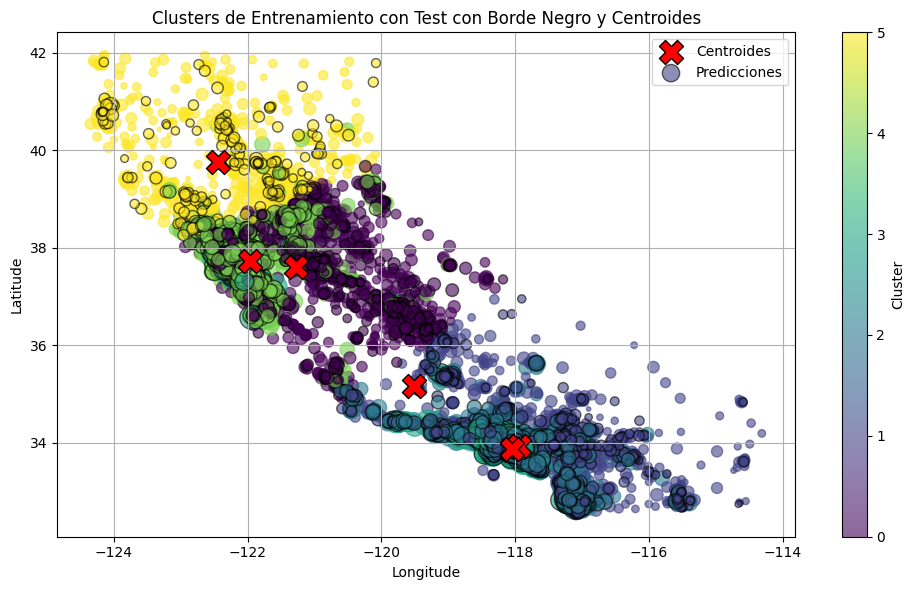

In [40]:

plt.figure(figsize=(10, 6))

# Scatter de los puntos de entrenamiento con colores por cluster
plt.scatter(
    X_train['Longitude'], X_train['Latitude'],
    c = X_train['Cluster'], cmap = 'viridis',
    s = X_train['MedInc'] * 20,  # Tamaño proporcional a MedInc
    alpha=0.6,
)

# Centroides
centroides = model.cluster_centers_
plt.scatter(
    centroides[:, 1], centroides[:, 0],  # Longitude y Latitude
    c = 'red', edgecolors = 'black', marker = 'X', s=300, label = 'Centroides',
    zorder = 10  # Asegura que estén por encima
)

# Scatter de los puntos de test con borde negro
plt.scatter(
    X_test['Longitude'], X_test['Latitude'],
    c = X_test['Cluster'], cmap = 'viridis',  # Usamos el mismo cmap para asignar colores por predicción
    s = X_test['MedInc'] * 20,  # Tamaño proporcional a MedInc
    alpha = 0.6, edgecolors = 'black',  # Borde negro para diferenciarlos
    label = 'Predicciones'
)

# Estética
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters de Entrenamiento con Test con Borde Negro y Centroides')
plt.colorbar(label = 'Cluster')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Paso 4: Entrena un modelo de clasificación supervisada

In [41]:
from sklearn.neighbors import KNeighborsClassifier

y_train = X_train['Cluster']

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, ..., 3, 0, 1], dtype=int32)

In [43]:
from sklearn.metrics import accuracy_score

y_test = X_test['Cluster']

accuracy_score(y_test, y_pred)

1.0

#### Guardar el modelo

In [44]:
with open("/Users/julian/Desktop/vs code/UNSUPERVISED_LEARNING_Project_25_Julian_Lopez/UNSUPERVISED_LEARNING_Project_25_Julian_Lopez/models/Model_KNN.pkl", "wb") as file:
  pickle.dump(model, file)